# Set-up

In [2]:
# --- Standard library ---

# --- Scientific computing ---
import numpy as np

# --- Network science ---

# --- Data handling and visualization ---
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


# --- Project source code ---

In [3]:
metadata = {
    "PROJECT_ID": "EMB_ex32",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v1.1",
    "DATE": "20230416"
}
TAG = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata)

df = pd.read_csv(f"../../results/dataframes/dataframe_{TAG}.csv")

In [4]:
df = df.replace({
    "{'imb'}": "Intercept",
    "{'emb'}": "Embedding",
    "{'deg'}": "Degree",
    "{'imb', 'emb'}": "Intercept + Embedding",
    "{'emb', 'imb'}": "Intercept + Embedding",
    "{'imb', 'deg'}": "Intercept + Degree",
    "{'deg', 'imb'}": "Intercept + Degree",
    "{'emb', 'deg'}": "Embedding + Degree",
    "{'deg', 'emb'}": "Embedding + Degree",
    "{'imb', 'emb', 'deg'}": "Intercept + Embedding + Degree",
    "{'imb', 'deg', 'emb'}": "Intercept + Embedding + Degree",
    "{'emb', 'deg', 'imb'}": "Intercept + Embedding + Degree",
    "{'emb', 'imb', 'deg'}": "Intercept + Embedding + Degree",
    "{'deg', 'imb', 'emb'}": "Intercept + Embedding + Degree",
    "{'deg', 'emb', 'imb'}": "Intercept + Embedding + Degree",
})

In [5]:
df["mu"] = df.system.apply(lambda x: float(x.split("_")[1].split("-")[1]))
df["prob"] = df.system.apply(lambda x: float(x.split("_")[2].split("-")[1]))

In [6]:
df = df.drop(columns=["Unnamed: 0", "system", "l1", "l2", "log_penalty"])

# Performance analysis

## Trade-off measures

In [7]:
BOX = [(0,0),(1,1)]  # lower left, upper right

_features = ["Embedding", "Intercept + Embedding", "Intercept + Degree", "Intercept + Embedding + Degree"]
df_ = df.query("features in @_features")

<Figure size 432x288 with 0 Axes>

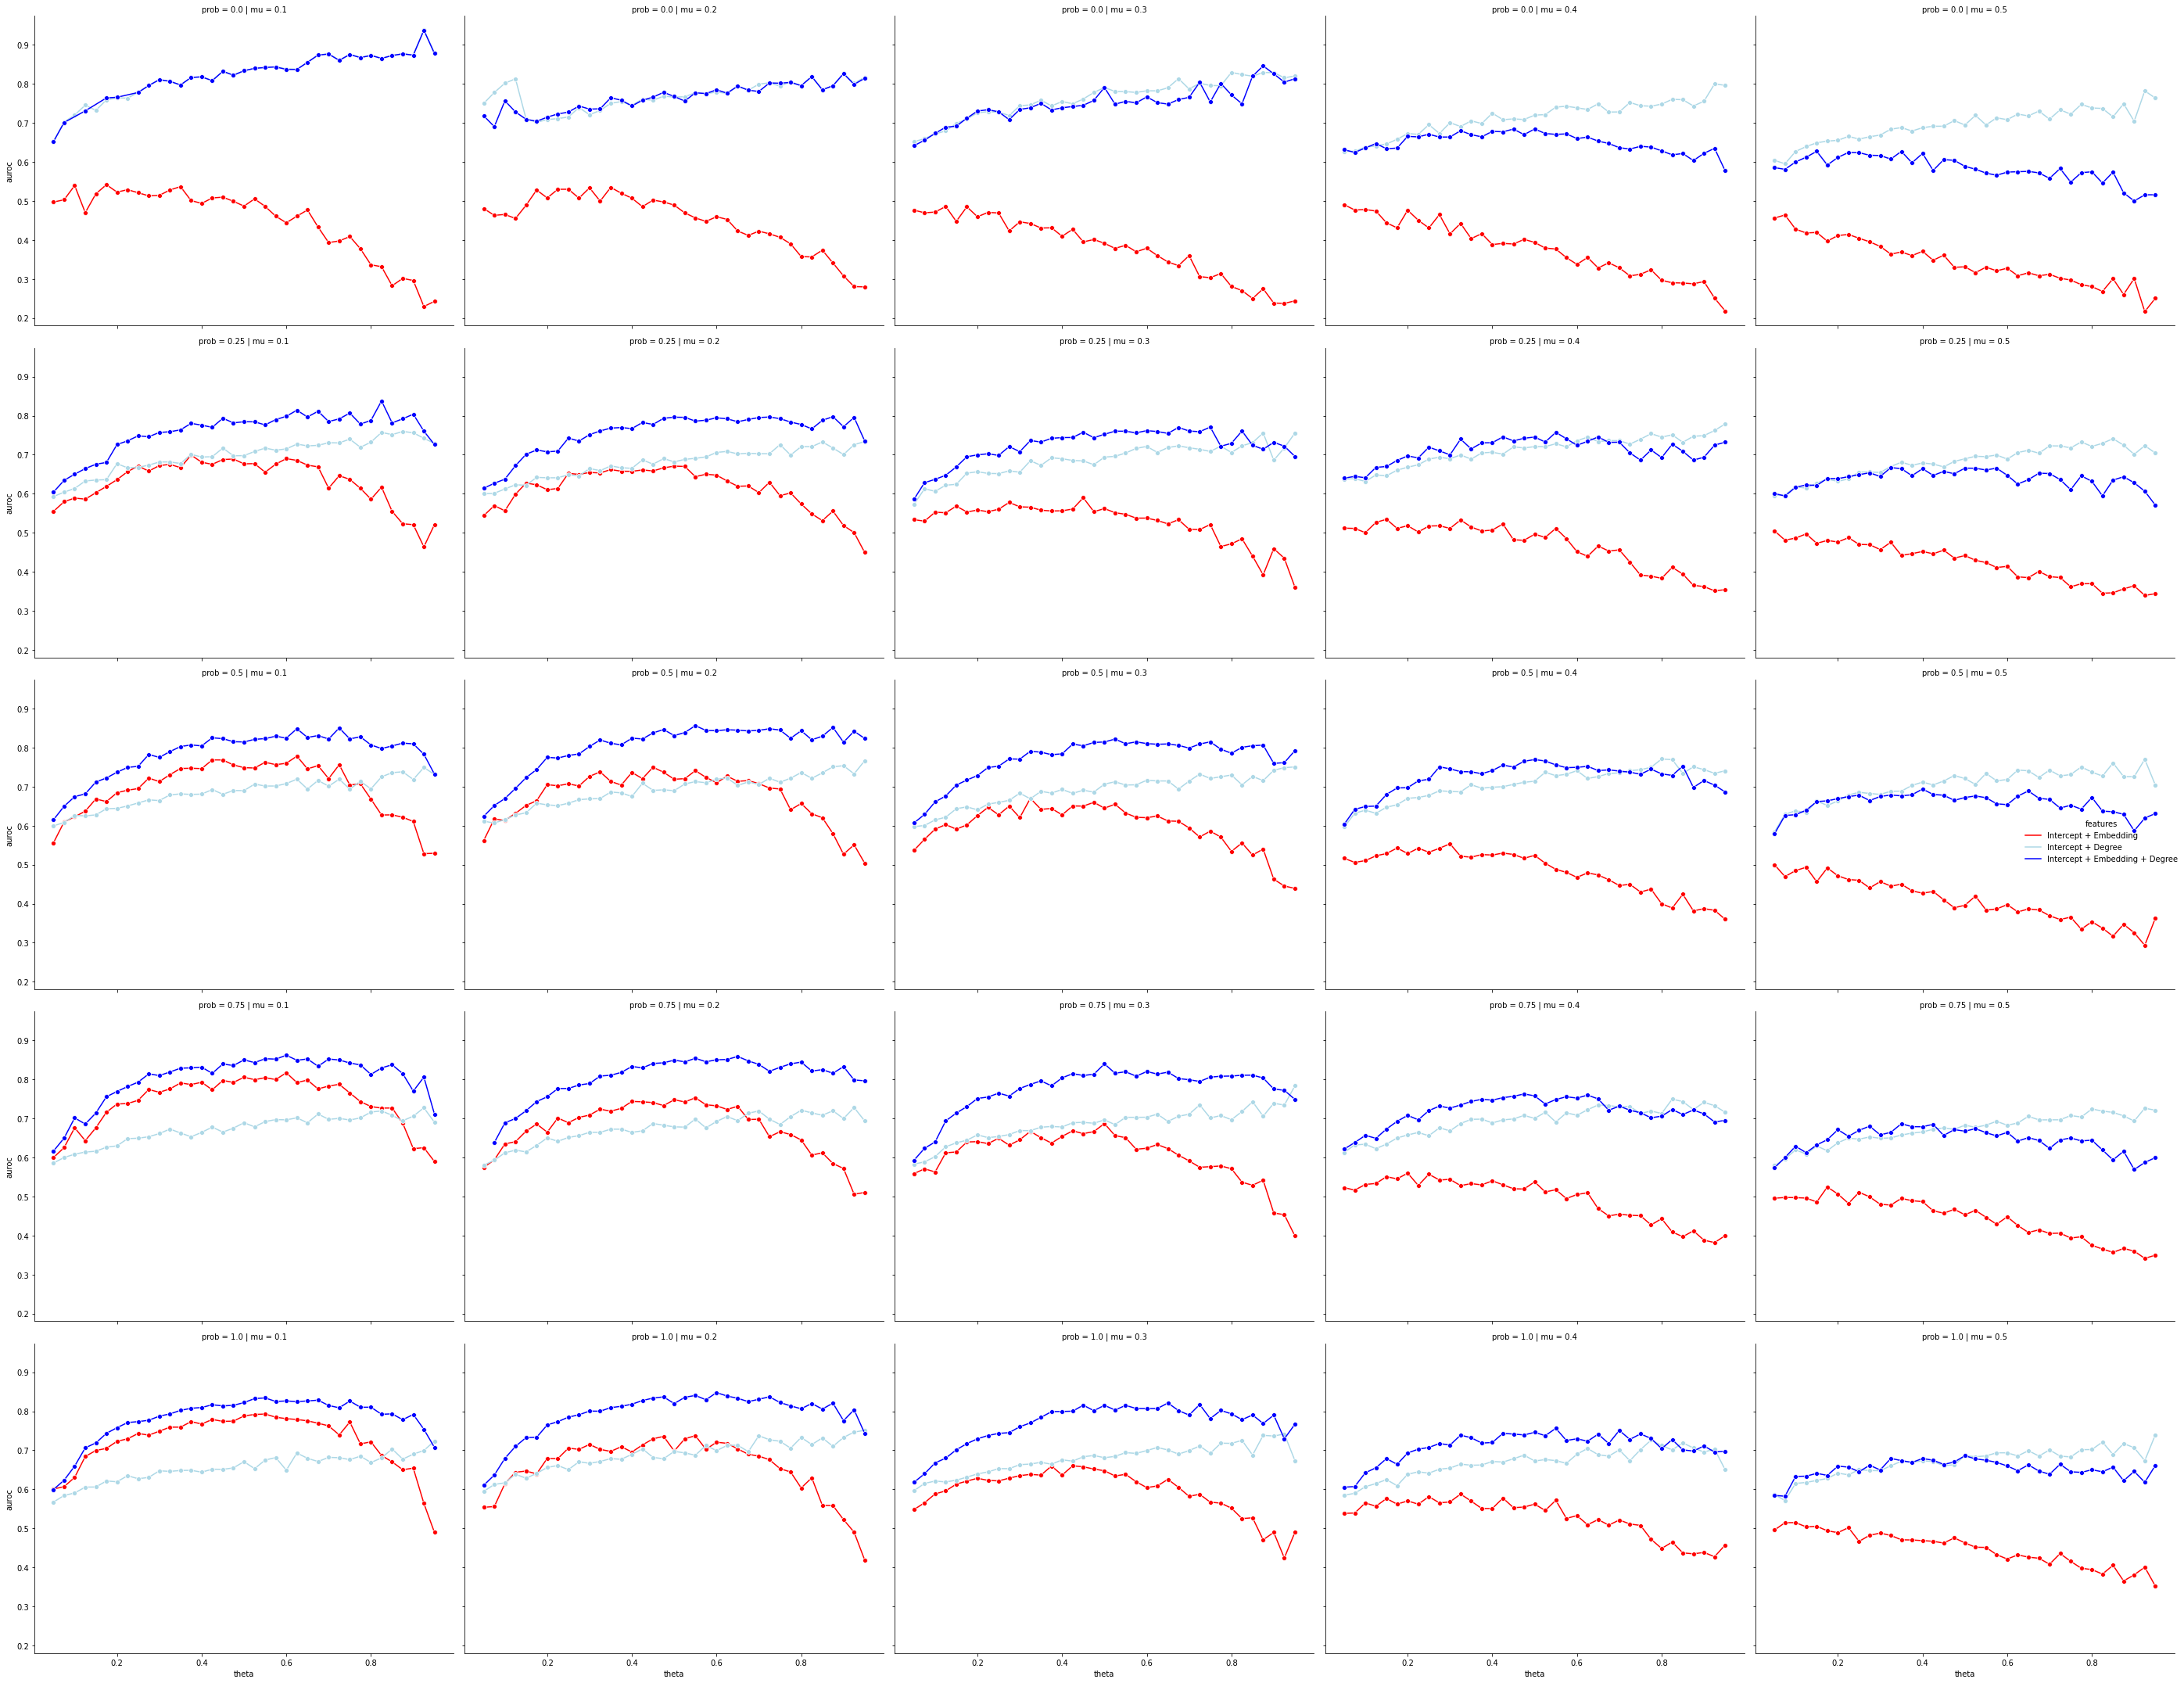

In [8]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_, kind="line",
    x="theta", y="auroc",
    hue="features", palette=["red", "lightblue", "blue"],
    col="mu", row="prob",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes

# Save plot
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

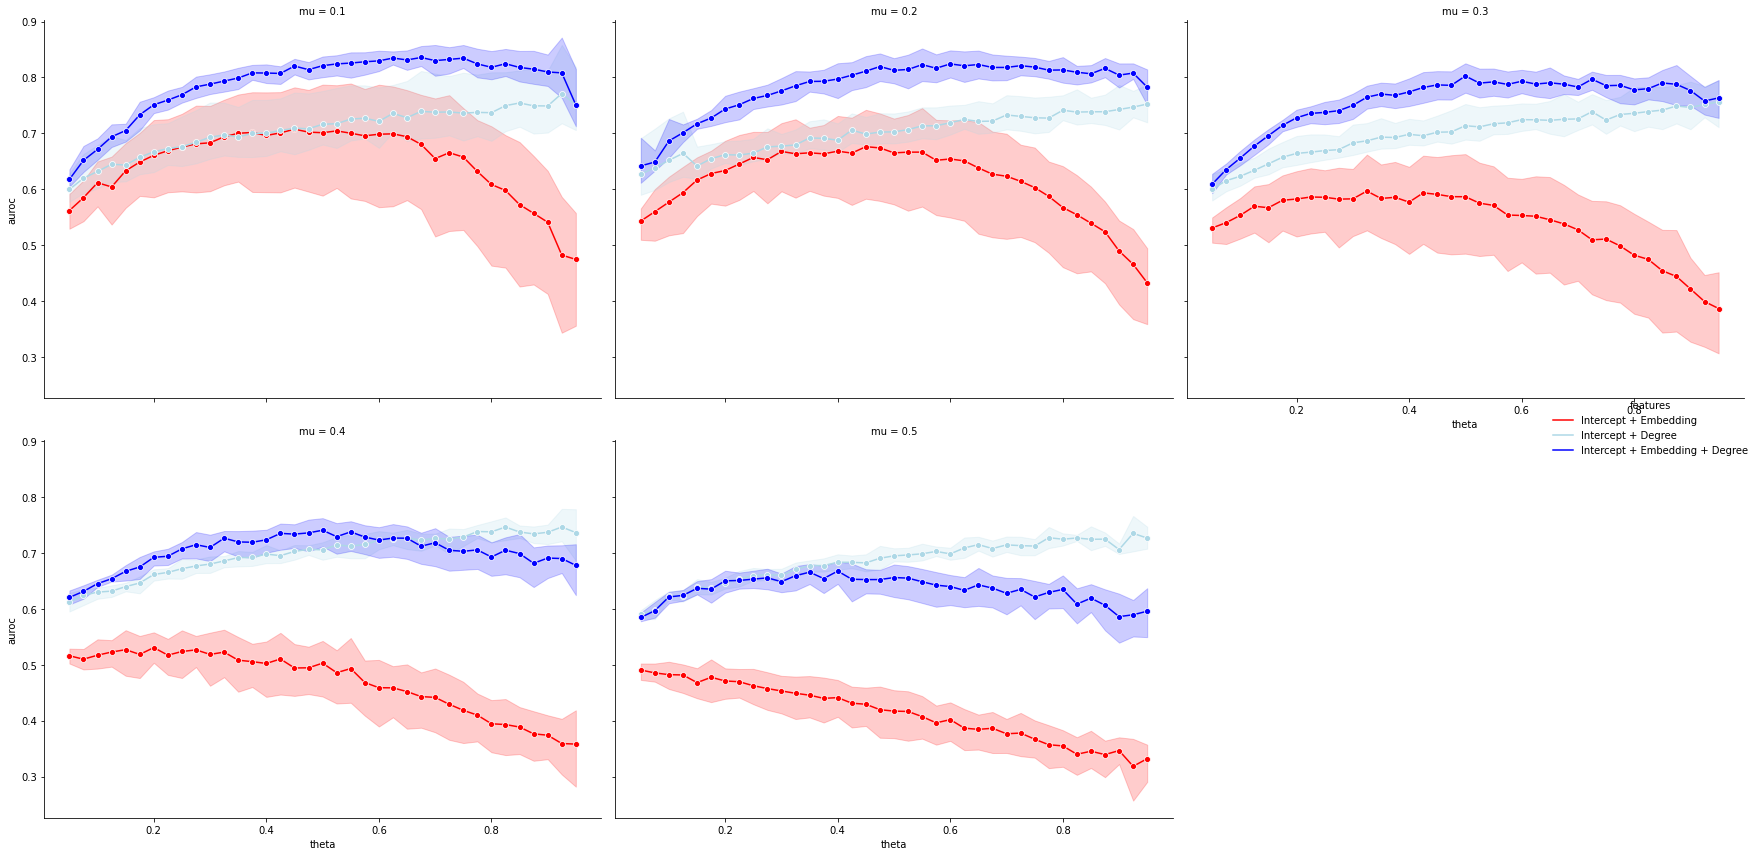

In [10]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_, kind="line",
    x="theta", y="auroc",
    hue="features", palette=["red", "lightblue", "blue"],
    col="mu", col_wrap=3,
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes

# Save plot
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

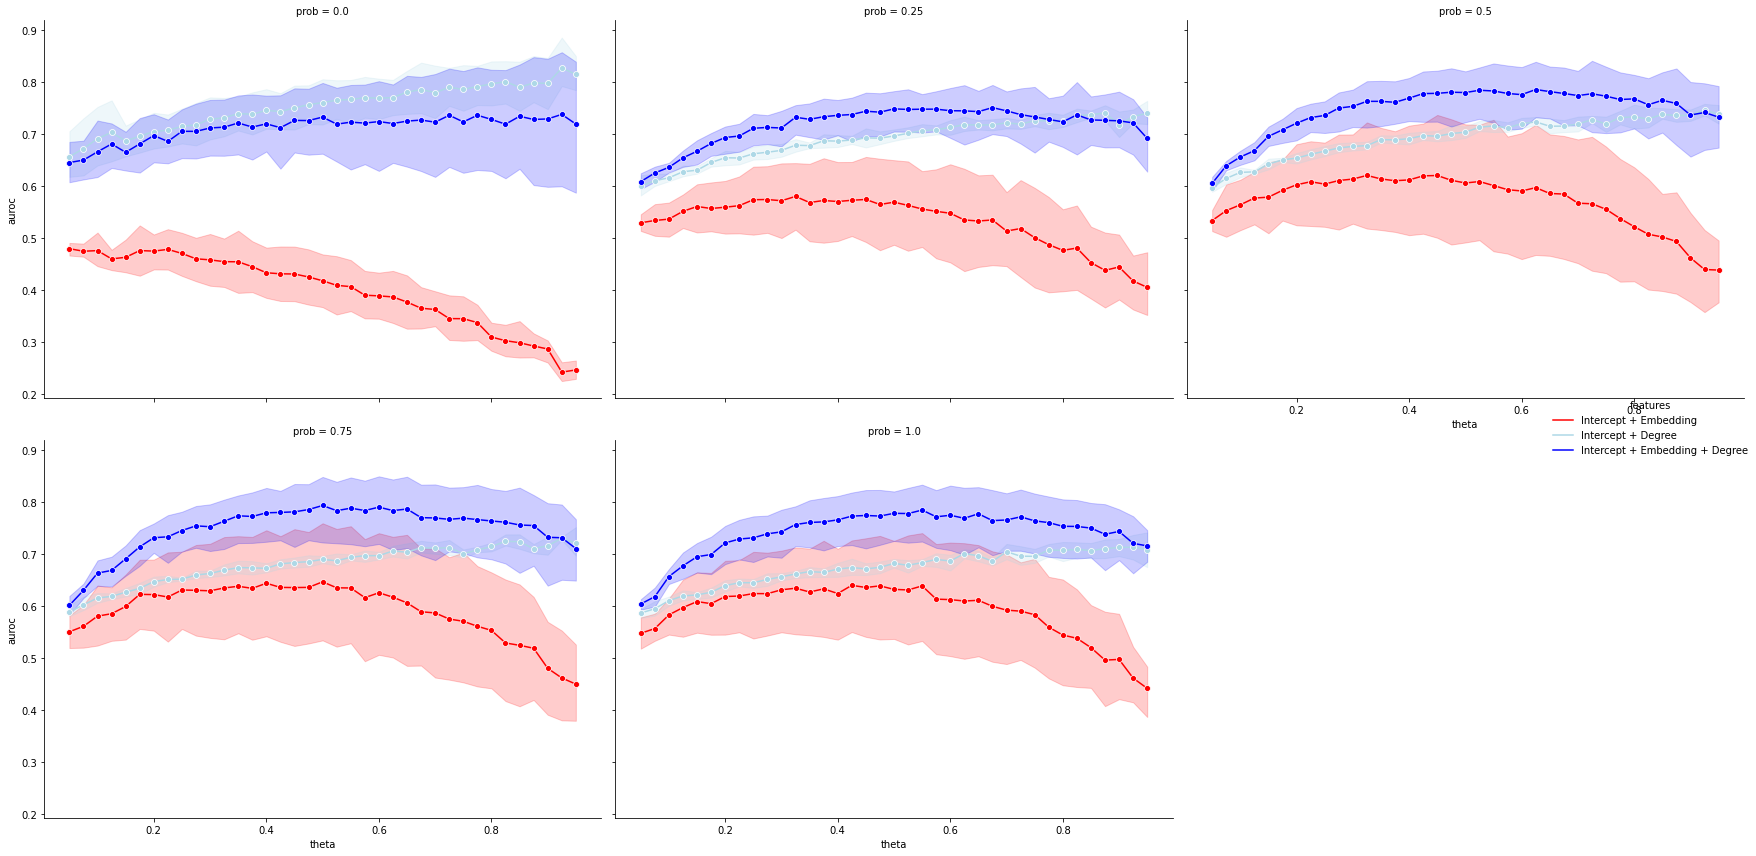

In [11]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_, kind="line",
    x="theta", y="auroc",
    hue="features", palette=["red", "lightblue", "blue"],
    col="prob", col_wrap=3,
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes

# Save plot
plt.tight_layout()

### Case Studies

#### Easy

<Figure size 432x288 with 0 Axes>

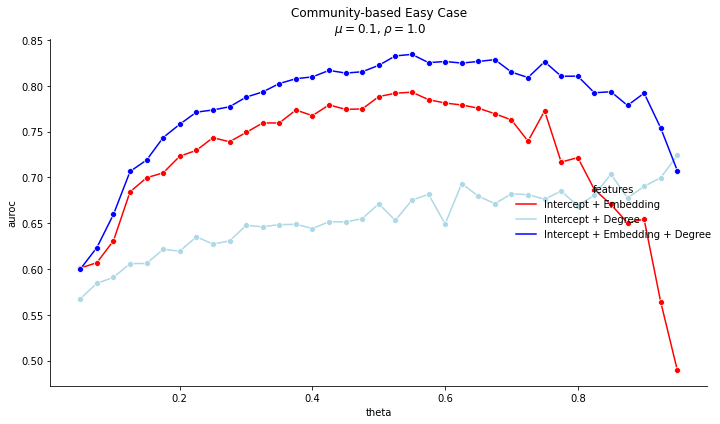

In [14]:
# Instantiate figure, subset relevant data
case_easy_prob = 1.0  # uncorrelated communities
case_easy_mu = 0.1  # strong communities
case_easy = df_.query("prob == @case_easy_prob & mu == @case_easy_mu")
plt.figure()

# Plotting data
sns.relplot(
    data=case_easy, kind="line",
    x="theta", y="auroc",
    hue="features", palette=["red", "lightblue", "blue"],
    col="mu", row="prob",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes
plt.title(f"Community-based Easy Case\n $\\mu = ${case_easy_mu}, $\\rho = ${case_easy_prob}")

# Save plot
plt.tight_layout()

#### Hard

<Figure size 432x288 with 0 Axes>

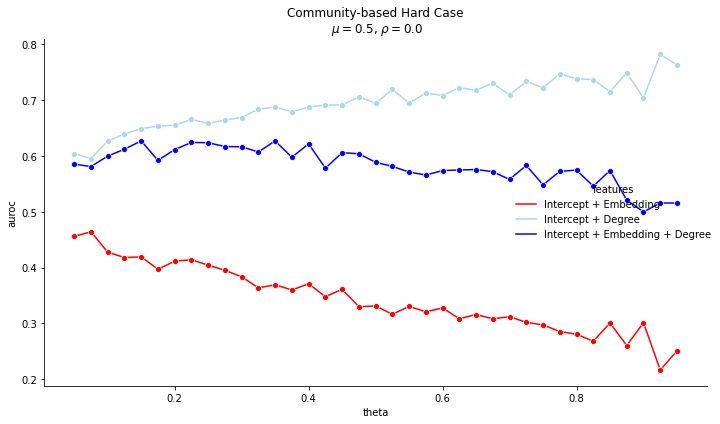

In [15]:
# Instantiate figure, subset relevant data
case_hard_prob = 0.0  # uncorrelated communities
case_hard_mu = 0.5  # strong communities
case_hard = df_.query("prob == @case_hard_prob & mu == @case_hard_mu")
plt.figure()

# Plotting data
sns.relplot(
    data=case_hard, kind="line",
    x="theta", y="auroc",
    hue="features", palette=["red", "lightblue", "blue"],
    col="mu", row="prob",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes
plt.title(f"Community-based Hard Case\n $\\mu = ${case_hard_mu}, $\\rho = ${case_hard_prob}")

# Save plot
plt.tight_layout()

#### "Impossible" for (C), meh for (DC)

## Singular measures

<Figure size 640x480 with 0 Axes>

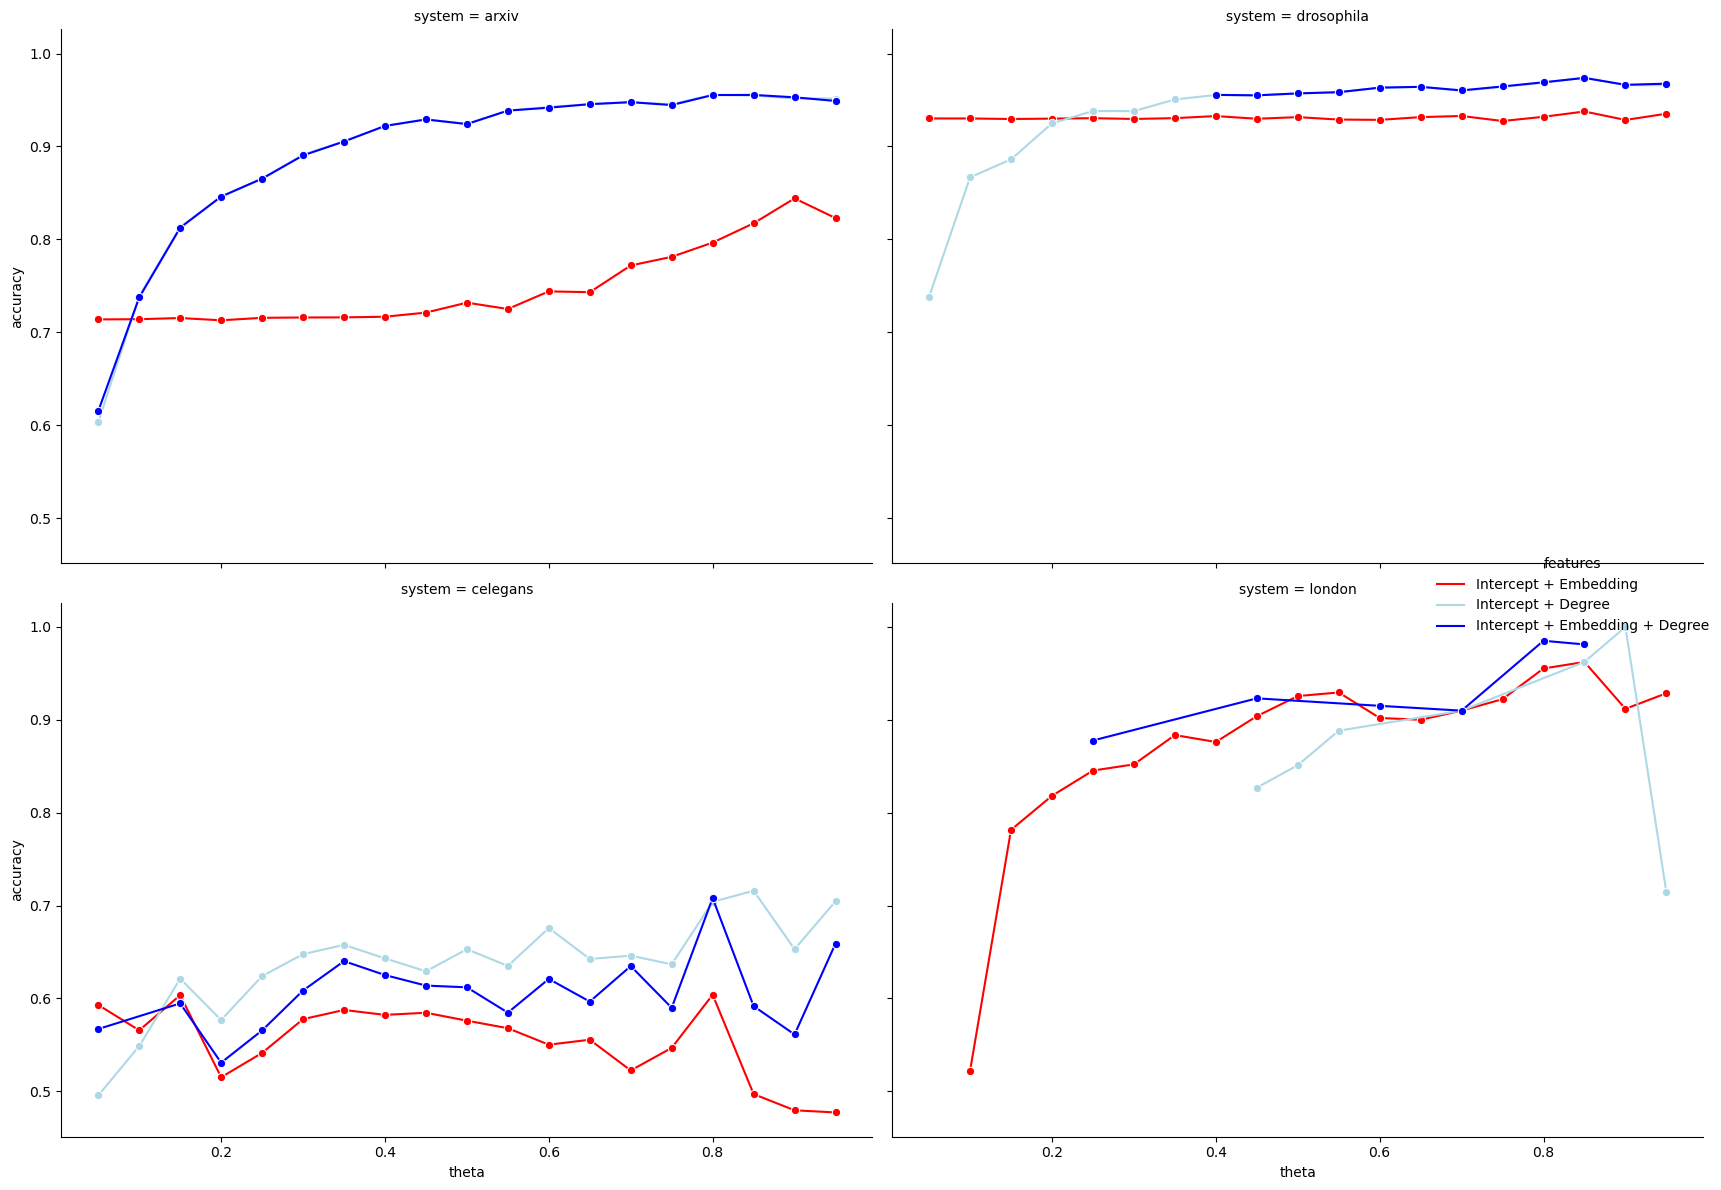

In [7]:
# Instantiate figure, subset relevant data
plt.figure()
BOX = [(0,0),(1,1)]  # lower left, upper right

_features = ["Intercept + Embedding", "Intercept + Degree", "Intercept + Embedding + Degree"]
df_ = df.query("features in @_features")

# Plotting data
sns.relplot(
    data=df_, kind="line",
    x="theta", y="accuracy",
    hue="features", palette=["red", "lightblue", "blue"],
    col="system", col_wrap=2,
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes


# Save plot
plt.tight_layout()
# plt.savefig(f"../../results/plots/line_auroc-pfi_imb-emb-r-deg_{TAG}.png", facecolor="white", transparent=False)

# Coefficient analysis

## Preprocessing

In [8]:
system = "arxiv"
df_ = df.query("features in @_features")
df_ = df_.query("system == @system")
df_ = df_.melt(
    id_vars=["theta", "features"],
    value_vars=["intercept", "coefficients"],
)

In [9]:
embcoefs_ = []
degcoefs_ = []
for row in df.iterrows():
    row = row[1]
    if row.coefficients != row.coefficients:
        embcoefs_.append(None)
        degcoefs_.append(None)
        continue


    if row.features == "Intercept + Embedding":
        embcoefs_.append(row.coefficients[1:-1])
        degcoefs_.append(None)
    elif row.features == "Intercept + Degree":
        embcoefs_.append(None)
        degcoefs_.append(row.coefficients[1:-1])
    else:
        coefs = row.coefficients[1:-1].split(", ")
        embcoefs_.append(coefs[0])
        degcoefs_.append(coefs[1])

df["coef_emb"] = embcoefs_
df["coef_deg"] = degcoefs_

## Coefficient evolution

<Figure size 640x480 with 0 Axes>

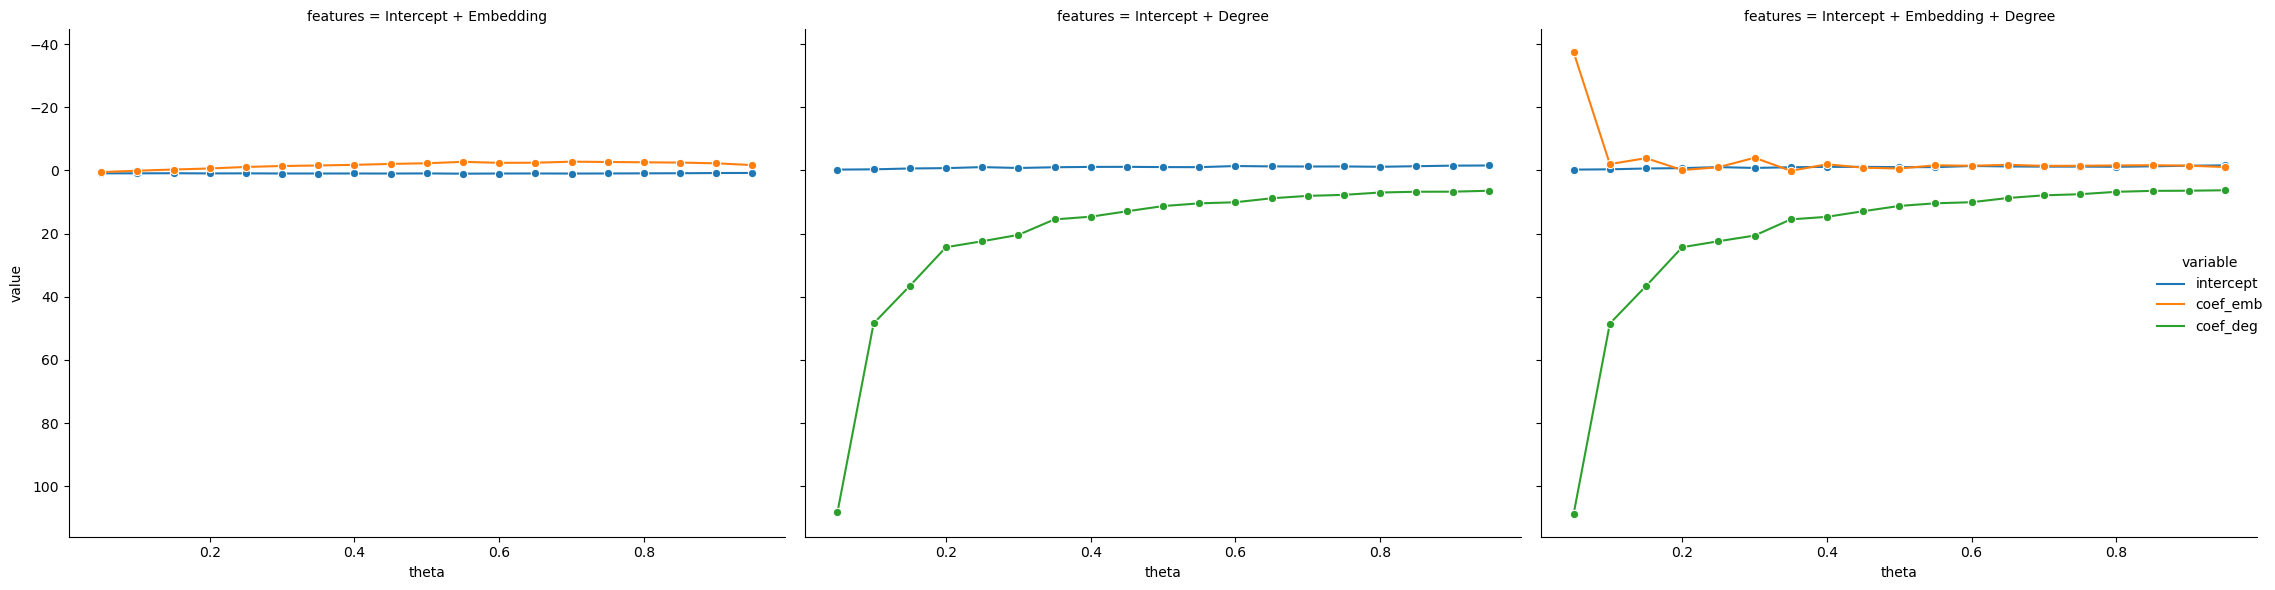

<Figure size 640x480 with 0 Axes>

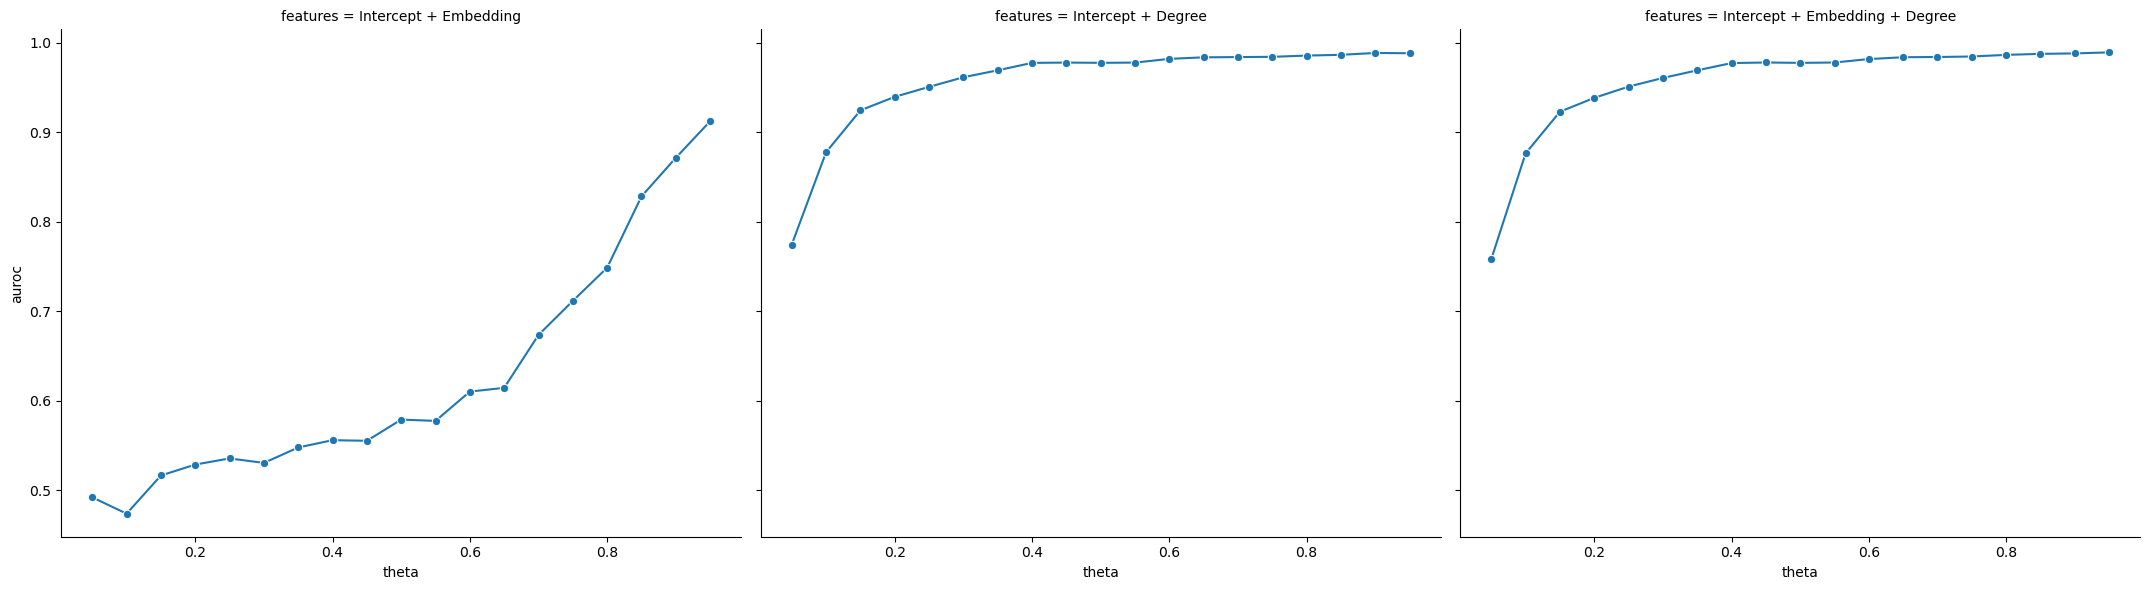

In [10]:
# Instantiate figure, subset relevant data
plt.figure()
BOX = [(0,0),(1,1)]  # lower left, upper right
_features = ["Intercept + Embedding", "Intercept + Degree", "Intercept + Embedding + Degree"]

df_ = df.query("features in @_features")
df_ = df_.query("system == @system")
df_melted = df_.melt(
    id_vars=["theta", "features"],
    value_vars=["intercept", "coef_emb", "coef_deg"],
)

# Plotting data
sns.relplot(
    data=df_melted, kind="line",
    x="theta", y="value",
    hue="variable",
    col="features",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes


# Save plot
plt.tight_layout()

# ==================================

# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_, kind="line",
    x="theta", y="auroc",
    col="features",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes

# Save plot
plt.tight_layout()

# Decision boundaries

In [11]:
def logistic(emb=0, deg=0, intercept=0, coef_emb=0, coef_deg=0):
    a = intercept + coef_emb*emb + coef_deg*deg
    b = 1 / (1 + np.exp(-a))

    return b

## arXiv

In [12]:
system = "arxiv"

Text(0.5, 1.0, 'arxiv Decision Boundary\nIntercept + Embedding features')

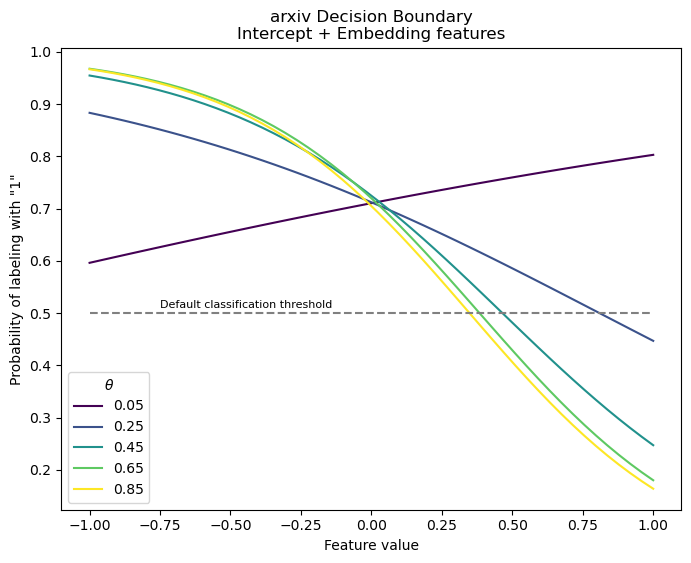

In [13]:
# Subset data
df_ = df.query("features == 'Intercept + Embedding' & system == @system")

# Set up predictor
deg = coef_deg = 0
X = np.linspace(-1,1)

# Set up figure
plt.figure(figsize=(8,6))
viridis = mpl.colormaps["viridis"]
idx = 0  # colormap index
theta_skip = 4  # so our legend isnt huge

# Plot predictors
for theta, df_group in list(df_.groupby("theta"))[::theta_skip]:
    # Calculate decision boundary
    intercept = df_group.iloc[0].intercept
    coef_emb = float(df_group.iloc[0].coefficients[1:-1])
    Y = [
        logistic(emb=x, deg=deg, intercept=intercept, coef_emb=coef_emb, coef_deg=coef_deg)
        for x in X
    ]

    # Plot logistic curve
    plt.plot(X, Y, label=f"{theta:.2f}", color=viridis(idx/theta_skip))

    # Increment colormap
    idx += 1

plt.hlines(0.5, -1, 1, linestyles="dashed", color="gray")
plt.legend(title="$\\theta$")

# Prettify figure
plt.annotate(
    "Default classification threshold",
    xy=(-0.5, 0.5), xytext=(-0.75, 0.51),
    size="8"
)
plt.xlabel("Feature value")
plt.ylabel("Probability of labeling with \"1\"")

plt.title(f"{system} Decision Boundary\nIntercept + Embedding features")

Text(0.5, 1.0, 'arxiv Decision Boundary\nIntercept + Degree features')

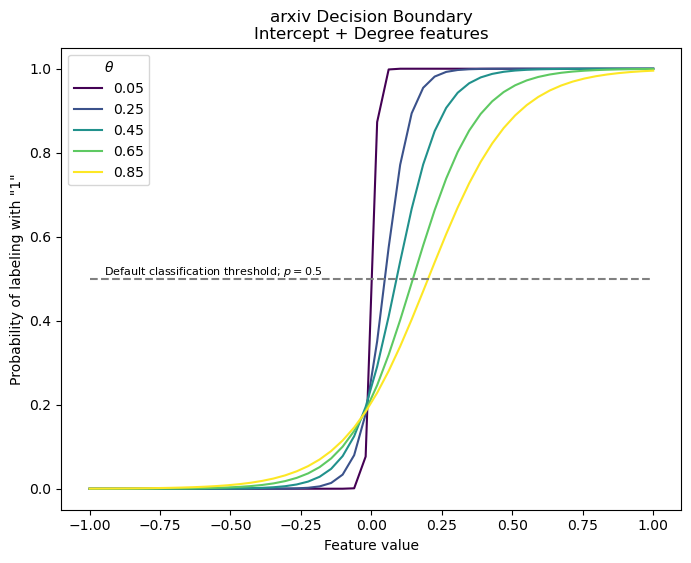

In [14]:
# Subset data
df_ = df.query("features == 'Intercept + Degree' & system == @system")

# Set up predictor
emb = coef_emb = 0
X = np.linspace(-1,1)

# Set up figure
plt.figure(figsize=(8,6))
viridis = mpl.colormaps["viridis"]
idx = 0  # colormap index
theta_skip = 4  # so our legend isnt huge

# Plot predictors
for theta, df_group in list(df_.groupby("theta"))[::theta_skip]:
    # Calculate decision boundary
    intercept = df_group.iloc[0].intercept
    coef_deg = float(df_group.iloc[0].coefficients[1:-1])
    Y = [
        logistic(emb=emb, deg=x, intercept=intercept, coef_emb=coef_emb, coef_deg=coef_deg)
        for x in X
    ]

    # Plot logistic curve
    plt.plot(X, Y, label=f"{theta:.2f}", color=viridis(idx/theta_skip))

    # Increment colormap
    idx += 1

plt.hlines(0.5, -1, 1, linestyles="dashed", color="gray")
plt.legend(title="$\\theta$")

# Prettify figure
plt.annotate(
    "Default classification threshold; $p=0.5$",
    xy=(-0.5, 0.5), xytext=(-0.95, 0.51),
    size="8"
)
plt.xlabel("Feature value")
plt.ylabel("Probability of labeling with \"1\"")

plt.title(f"{system} Decision Boundary\nIntercept + Degree features")

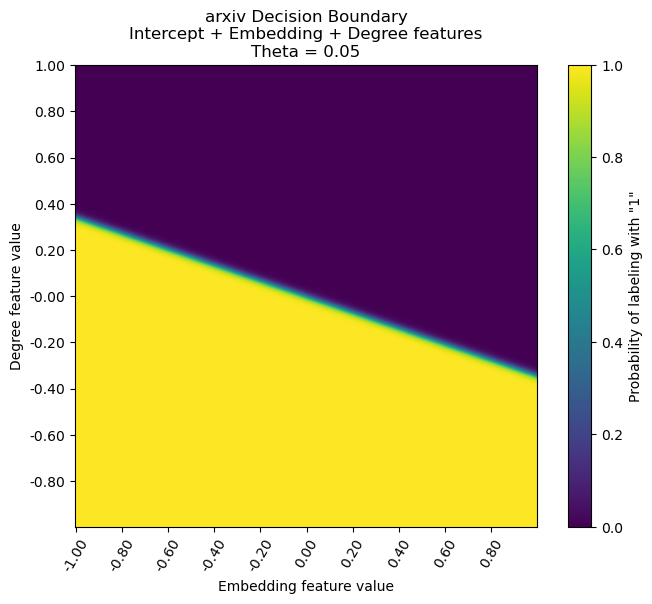

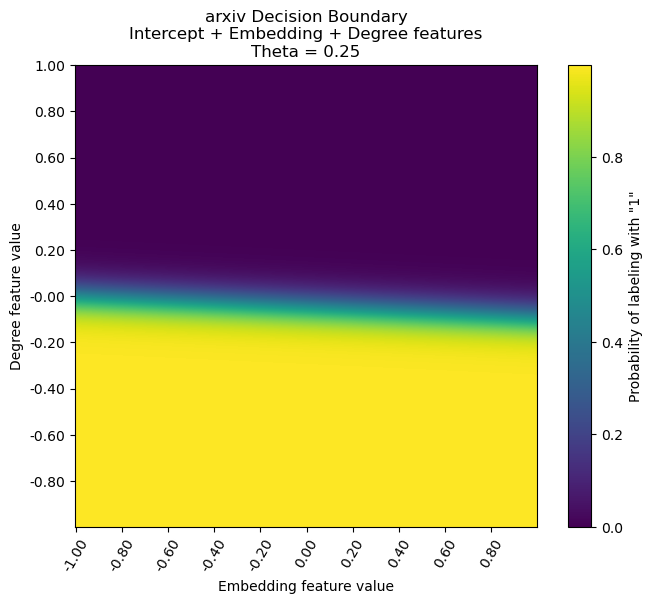

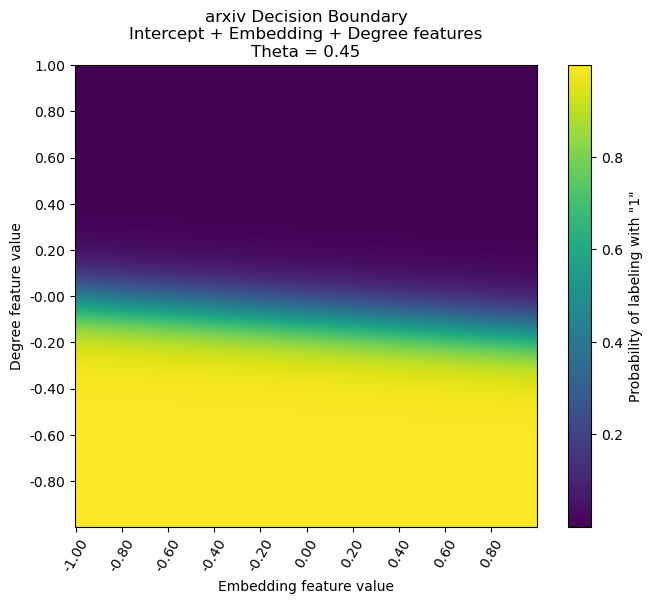

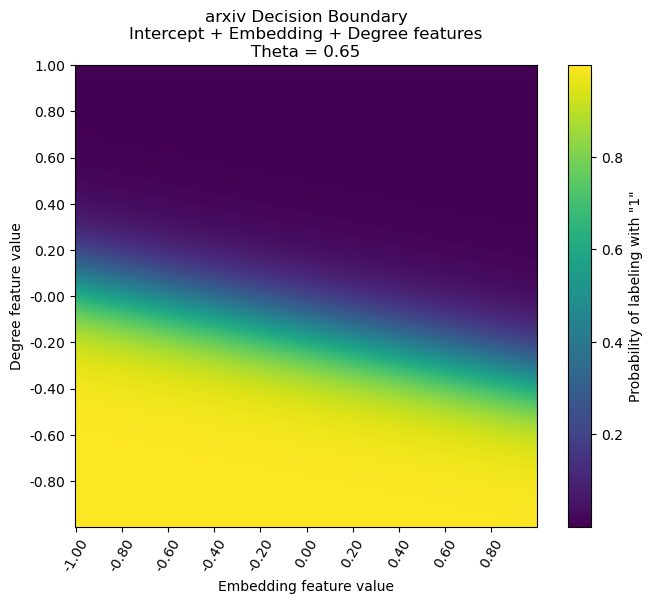

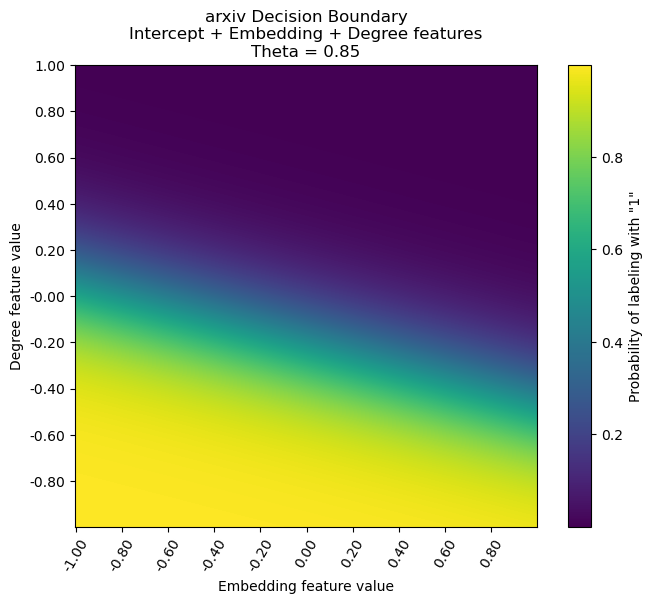

In [15]:
# Subset data
df_ = df.query("features == 'Intercept + Embedding + Degree' & system == @system")

# Set up predictor
X = np.linspace(-1,1, num=500)

# Set up figure

# Calculate decision boundary
for df_group in list(df_.groupby("theta"))[::4]:
    plt.figure(figsize=(8,6))
    theta, df_group = df_group
    intercept = df_group.iloc[0].intercept
    if intercept != intercept:
        continue
    coefs = df_group.iloc[0].coefficients[1:-1].split(", ")
    coef_emb = float(coefs[0])
    coef_deg = float(coefs[1])

    Z = np.array([
        logistic(emb=x, deg=y, intercept=intercept, coef_emb=coef_emb, coef_deg=coef_deg)
        for y in X for x in X
    ]).reshape(len(X), len(X))

    # Plot logistic curve
    plt.imshow(Z)

    # Prettify figure
    plt.colorbar(label="Probability of labeling with \"1\"")

    plt.xticks(range(len(X))[::50], labels=[f"{x:.2f}" for x in X[::50]], rotation=60)
    plt.yticks(range(len(X))[::50], labels=[f"{x:.2f}" for x in X[::-50]])

    plt.xlabel("Embedding feature value")
    plt.ylabel("Degree feature value")
    plt.title(f"{system} Decision Boundary\nIntercept + Embedding + Degree features\nTheta = {theta:.2f}")

## _C. Elegans_

In [16]:
system = "celegans"

Text(0.5, 1.0, 'celegans Decision Boundary\nIntercept + Embedding features')

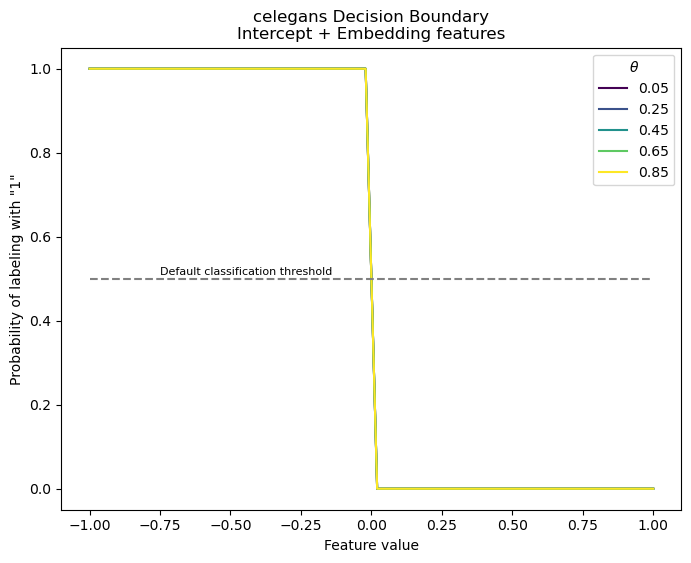

In [17]:
# Subset data
df_ = df.query("features == 'Intercept + Embedding' & system == @system")

# Set up predictor
deg = coef_deg = 0
X = np.linspace(-1,1)

# Set up figure
plt.figure(figsize=(8,6))
viridis = mpl.colormaps["viridis"]
idx = 0  # colormap index
theta_skip = 4  # so our legend isnt huge

# Plot predictors
for theta, df_group in list(df_.groupby("theta"))[::theta_skip]:
    # Calculate decision boundary
    intercept = df_group.iloc[0].intercept
    coef_emb = float(df_group.iloc[0].coefficients[1:-1])
    Y = [
        logistic(emb=x, deg=deg, intercept=intercept, coef_emb=coef_emb, coef_deg=coef_deg)
        for x in X
    ]

    # Plot logistic curve
    plt.plot(X, Y, label=f"{theta:.2f}", color=viridis(idx/theta_skip))

    # Increment colormap
    idx += 1

plt.hlines(0.5, -1, 1, linestyles="dashed", color="gray")
plt.legend(title="$\\theta$")

# Prettify figure
plt.annotate(
    "Default classification threshold",
    xy=(-0.5, 0.5), xytext=(-0.75, 0.51),
    size="8"
)
plt.xlabel("Feature value")
plt.ylabel("Probability of labeling with \"1\"")

plt.title(f"{system} Decision Boundary\nIntercept + Embedding features")

Text(0.5, 1.0, 'celegans Decision Boundary\nIntercept + Degree features')

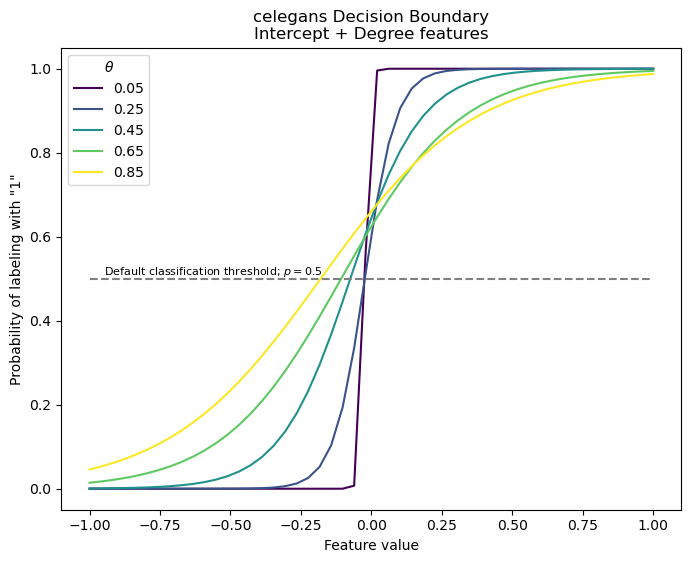

In [18]:
# Subset data
df_ = df.query("features == 'Intercept + Degree' & system == @system")

# Set up predictor
emb = coef_emb = 0
X = np.linspace(-1,1)

# Set up figure
plt.figure(figsize=(8,6))
viridis = mpl.colormaps["viridis"]
idx = 0  # colormap index
theta_skip = 4  # so our legend isnt huge

# Plot predictors
for theta, df_group in list(df_.groupby("theta"))[::theta_skip]:
    # Calculate decision boundary
    intercept = df_group.iloc[0].intercept
    coef_deg = float(df_group.iloc[0].coefficients[1:-1])
    Y = [
        logistic(emb=emb, deg=x, intercept=intercept, coef_emb=coef_emb, coef_deg=coef_deg)
        for x in X
    ]

    # Plot logistic curve
    plt.plot(X, Y, label=f"{theta:.2f}", color=viridis(idx/theta_skip))

    # Increment colormap
    idx += 1

plt.hlines(0.5, -1, 1, linestyles="dashed", color="gray")
plt.legend(title="$\\theta$")

# Prettify figure
plt.annotate(
    "Default classification threshold; $p=0.5$",
    xy=(-0.5, 0.5), xytext=(-0.95, 0.51),
    size="8"
)
plt.xlabel("Feature value")
plt.ylabel("Probability of labeling with \"1\"")

plt.title(f"{system} Decision Boundary\nIntercept + Degree features")

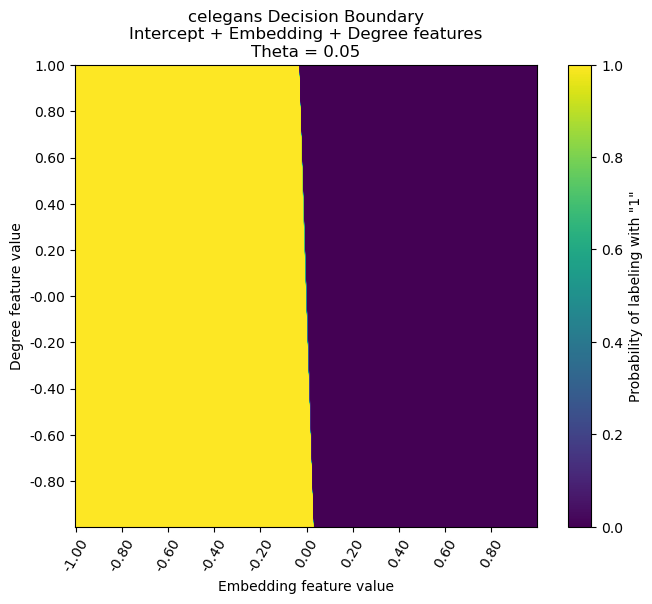

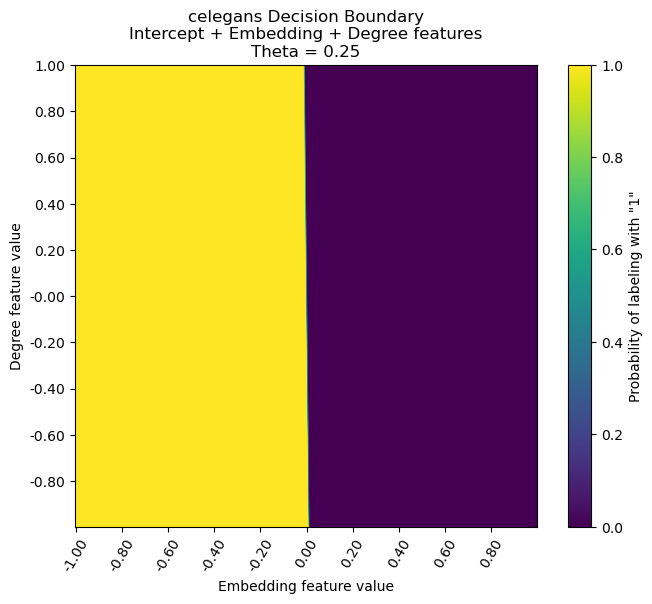

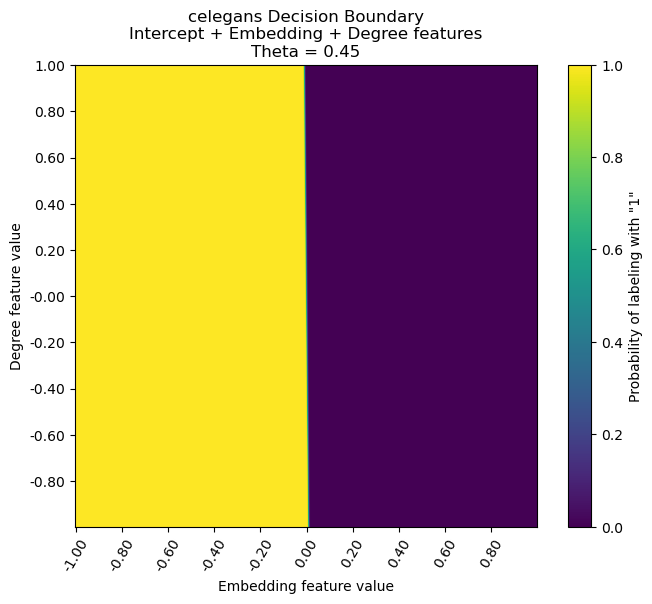

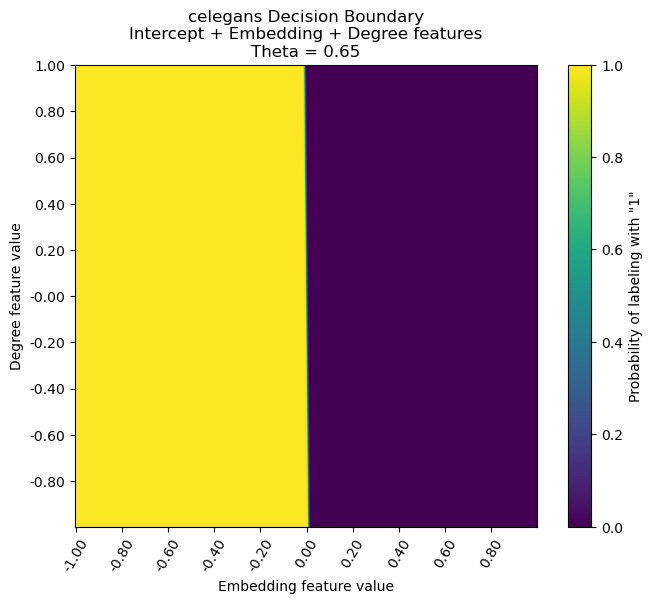

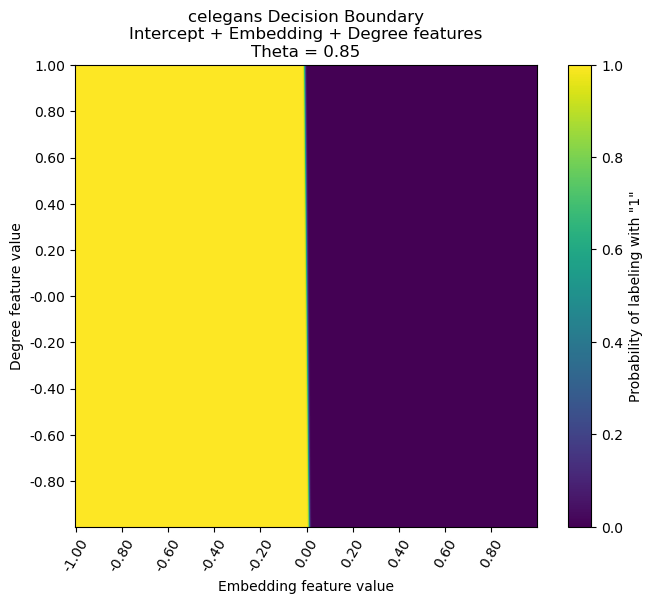

In [19]:
# Subset data
df_ = df.query("features == 'Intercept + Embedding + Degree' & system == @system")

# Set up predictor
X = np.linspace(-1,1, num=500)

# Set up figure

# Calculate decision boundary
for df_group in list(df_.groupby("theta"))[::4]:
    plt.figure(figsize=(8,6))
    theta, df_group = df_group
    intercept = df_group.iloc[0].intercept
    if intercept != intercept:
        continue
    coefs = df_group.iloc[0].coefficients[1:-1].split(", ")
    coef_emb = float(coefs[0])
    coef_deg = float(coefs[1])

    Z = np.array([
        logistic(emb=x, deg=y, intercept=intercept, coef_emb=coef_emb, coef_deg=coef_deg)
        for y in X for x in X
    ]).reshape(len(X), len(X))

    # Plot logistic curve
    plt.imshow(Z)

    # Prettify figure
    plt.colorbar(label="Probability of labeling with \"1\"")

    plt.xticks(range(len(X))[::50], labels=[f"{x:.2f}" for x in X[::50]], rotation=60)
    plt.yticks(range(len(X))[::50], labels=[f"{x:.2f}" for x in X[::-50]])

    plt.xlabel("Embedding feature value")
    plt.ylabel("Degree feature value")
    plt.title(f"{system} Decision Boundary\nIntercept + Embedding + Degree features\nTheta = {theta:.2f}")

## Drosophila

In [20]:
system = "drosophila"

Text(0.5, 1.0, 'drosophila Decision Boundary\nIntercept + Embedding features')

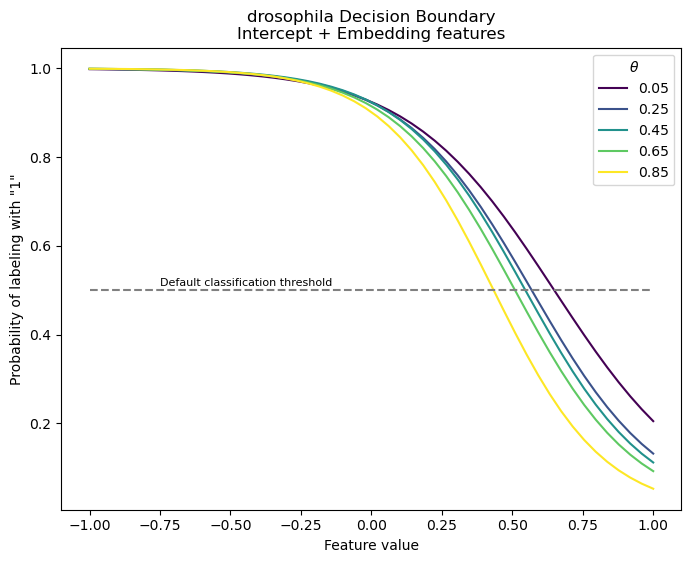

In [21]:
# Subset data
df_ = df.query("features == 'Intercept + Embedding' & system == @system")

# Set up predictor
deg = coef_deg = 0
X = np.linspace(-1,1)

# Set up figure
plt.figure(figsize=(8,6))
viridis = mpl.colormaps["viridis"]
idx = 0  # colormap index
theta_skip = 4  # so our legend isnt huge

# Plot predictors
for theta, df_group in list(df_.groupby("theta"))[::theta_skip]:
    # Calculate decision boundary
    intercept = df_group.iloc[0].intercept
    coef_emb = float(df_group.iloc[0].coefficients[1:-1])
    Y = [
        logistic(emb=x, deg=deg, intercept=intercept, coef_emb=coef_emb, coef_deg=coef_deg)
        for x in X
    ]

    # Plot logistic curve
    plt.plot(X, Y, label=f"{theta:.2f}", color=viridis(idx/theta_skip))

    # Increment colormap
    idx += 1

plt.hlines(0.5, -1, 1, linestyles="dashed", color="gray")
plt.legend(title="$\\theta$")

# Prettify figure
plt.annotate(
    "Default classification threshold",
    xy=(-0.5, 0.5), xytext=(-0.75, 0.51),
    size="8"
)
plt.xlabel("Feature value")
plt.ylabel("Probability of labeling with \"1\"")

plt.title(f"{system} Decision Boundary\nIntercept + Embedding features")

Text(0.5, 1.0, 'drosophila Decision Boundary\nIntercept + Degree features')

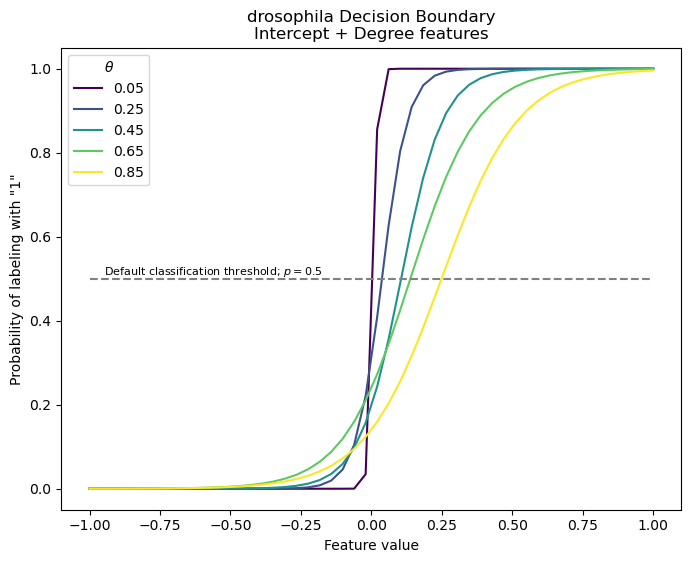

In [22]:
# Subset data
df_ = df.query("features == 'Intercept + Degree' & system == @system")

# Set up predictor
emb = coef_emb = 0
X = np.linspace(-1,1)

# Set up figure
plt.figure(figsize=(8,6))
viridis = mpl.colormaps["viridis"]
idx = 0  # colormap index
theta_skip = 4  # so our legend isnt huge

# Plot predictors
for theta, df_group in list(df_.groupby("theta"))[::theta_skip]:
    # Calculate decision boundary
    intercept = df_group.iloc[0].intercept
    coef_deg = float(df_group.iloc[0].coefficients[1:-1])
    Y = [
        logistic(emb=emb, deg=x, intercept=intercept, coef_emb=coef_emb, coef_deg=coef_deg)
        for x in X
    ]

    # Plot logistic curve
    plt.plot(X, Y, label=f"{theta:.2f}", color=viridis(idx/theta_skip))

    # Increment colormap
    idx += 1

plt.hlines(0.5, -1, 1, linestyles="dashed", color="gray")
plt.legend(title="$\\theta$")

# Prettify figure
plt.annotate(
    "Default classification threshold; $p=0.5$",
    xy=(-0.5, 0.5), xytext=(-0.95, 0.51),
    size="8"
)
plt.xlabel("Feature value")
plt.ylabel("Probability of labeling with \"1\"")

plt.title(f"{system} Decision Boundary\nIntercept + Degree features")

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

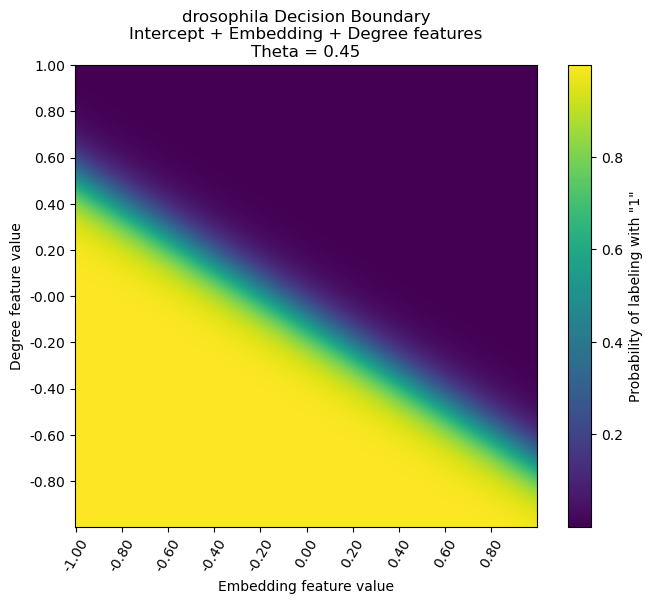

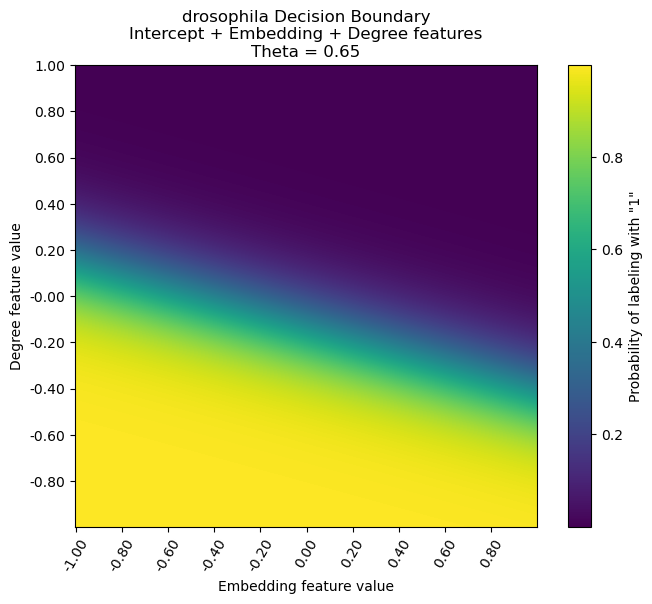

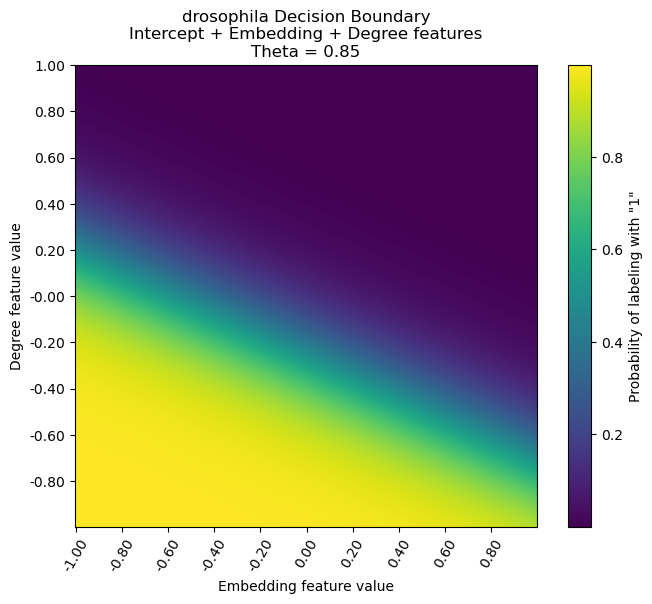

In [23]:
# Subset data
df_ = df.query("features == 'Intercept + Embedding + Degree' & system == @system")

# Set up predictor
X = np.linspace(-1,1, num=500)

# Set up figure

# Calculate decision boundary
for df_group in list(df_.groupby("theta"))[::4]:
    plt.figure(figsize=(8,6))
    theta, df_group = df_group
    intercept = df_group.iloc[0].intercept
    if intercept != intercept:
        continue
    coefs = df_group.iloc[0].coefficients[1:-1].split(", ")
    coef_emb = float(coefs[0])
    coef_deg = float(coefs[1])

    Z = np.array([
        logistic(emb=x, deg=y, intercept=intercept, coef_emb=coef_emb, coef_deg=coef_deg)
        for y in X for x in X
    ]).reshape(len(X), len(X))

    # Plot logistic curve
    plt.imshow(Z)

    # Prettify figure
    plt.colorbar(label="Probability of labeling with \"1\"")

    plt.xticks(range(len(X))[::50], labels=[f"{x:.2f}" for x in X[::50]], rotation=60)
    plt.yticks(range(len(X))[::50], labels=[f"{x:.2f}" for x in X[::-50]])

    plt.xlabel("Embedding feature value")
    plt.ylabel("Degree feature value")
    plt.title(f"{system} Decision Boundary\nIntercept + Embedding + Degree features\nTheta = {theta:.2f}")

## London

In [24]:
system = "london"

Text(0.5, 1.0, 'london Decision Boundary\nIntercept + Embedding features')

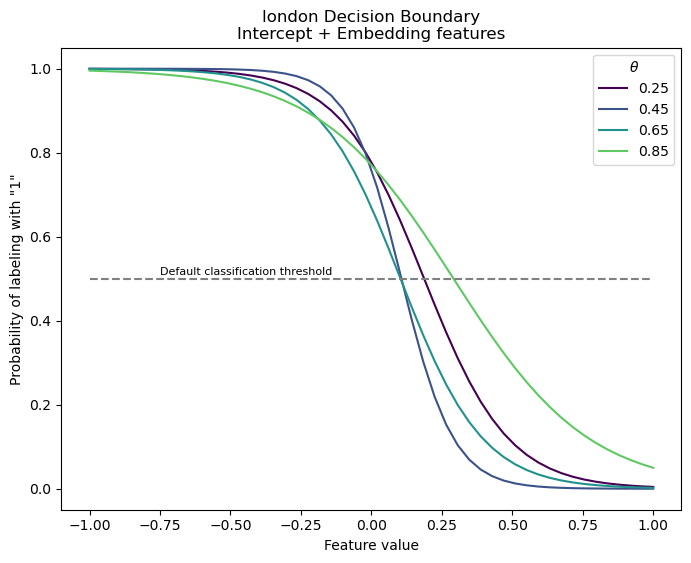

In [25]:
# Subset data
df_ = df.query("features == 'Intercept + Embedding' & system == @system")

# Set up predictor
deg = coef_deg = 0
X = np.linspace(-1,1)

# Set up figure
plt.figure(figsize=(8,6))
viridis = mpl.colormaps["viridis"]
idx = 0  # colormap index
theta_skip = 4  # so our legend isnt huge

# Plot predictors
for theta, df_group in list(df_.groupby("theta"))[::theta_skip]:
    # Calculate decision boundary
    intercept = df_group.iloc[0].intercept
    if intercept != intercept:
        continue
    coef_emb = float(df_group.iloc[0].coefficients[1:-1])
    Y = [
        logistic(emb=x, deg=deg, intercept=intercept, coef_emb=coef_emb, coef_deg=coef_deg)
        for x in X
    ]

    # Plot logistic curve
    plt.plot(X, Y, label=f"{theta:.2f}", color=viridis(idx/theta_skip))

    # Increment colormap
    idx += 1

plt.hlines(0.5, -1, 1, linestyles="dashed", color="gray")
plt.legend(title="$\\theta$")

# Prettify figure
plt.annotate(
    "Default classification threshold",
    xy=(-0.5, 0.5), xytext=(-0.75, 0.51),
    size="8"
)
plt.xlabel("Feature value")
plt.ylabel("Probability of labeling with \"1\"")

plt.title(f"{system} Decision Boundary\nIntercept + Embedding features")

Text(0.5, 1.0, 'london Decision Boundary\nIntercept + Degree features')

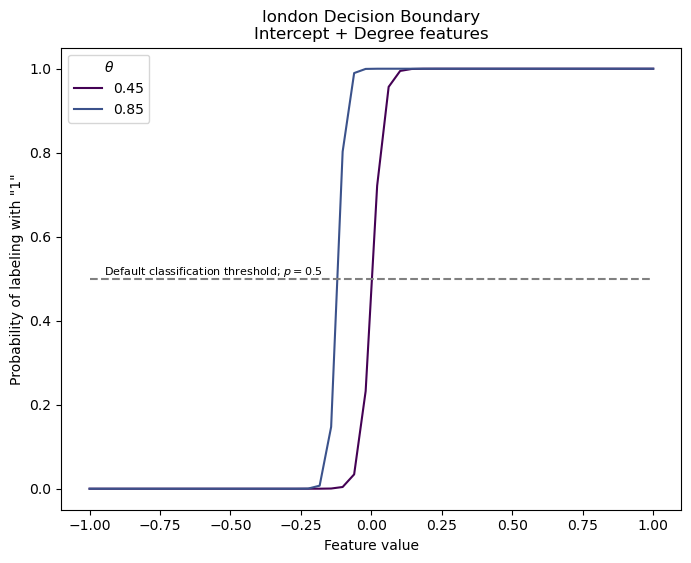

In [26]:
# Subset data
df_ = df.query("features == 'Intercept + Degree' & system == @system")

# Set up predictor
emb = coef_emb = 0
X = np.linspace(-1,1)

# Set up figure
plt.figure(figsize=(8,6))
viridis = mpl.colormaps["viridis"]
idx = 0  # colormap index
theta_skip = 4  # so our legend isnt huge

# Plot predictors
for theta, df_group in list(df_.groupby("theta"))[::theta_skip]:
    # Calculate decision boundary
    intercept = df_group.iloc[0].intercept
    if intercept != intercept:
        continue
    coef_deg = float(df_group.iloc[0].coefficients[1:-1])
    Y = [
        logistic(emb=emb, deg=x, intercept=intercept, coef_emb=coef_emb, coef_deg=coef_deg)
        for x in X
    ]

    # Plot logistic curve
    plt.plot(X, Y, label=f"{theta:.2f}", color=viridis(idx/theta_skip))

    # Increment colormap
    idx += 1

plt.hlines(0.5, -1, 1, linestyles="dashed", color="gray")
plt.legend(title="$\\theta$")

# Prettify figure
plt.annotate(
    "Default classification threshold; $p=0.5$",
    xy=(-0.5, 0.5), xytext=(-0.95, 0.51),
    size="8"
)
plt.xlabel("Feature value")
plt.ylabel("Probability of labeling with \"1\"")

plt.title(f"{system} Decision Boundary\nIntercept + Degree features")

<Figure size 800x600 with 0 Axes>

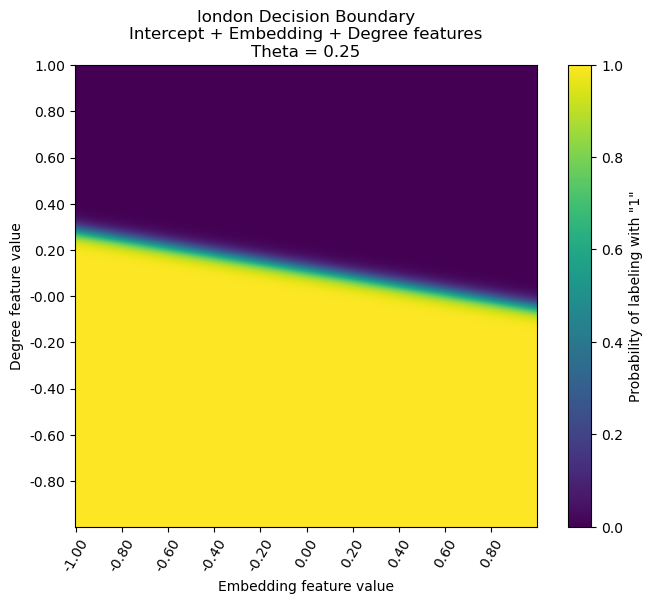

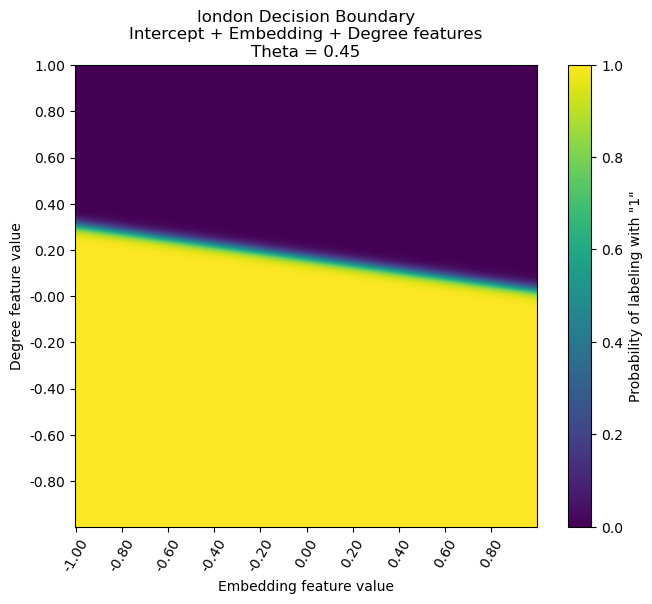

<Figure size 800x600 with 0 Axes>

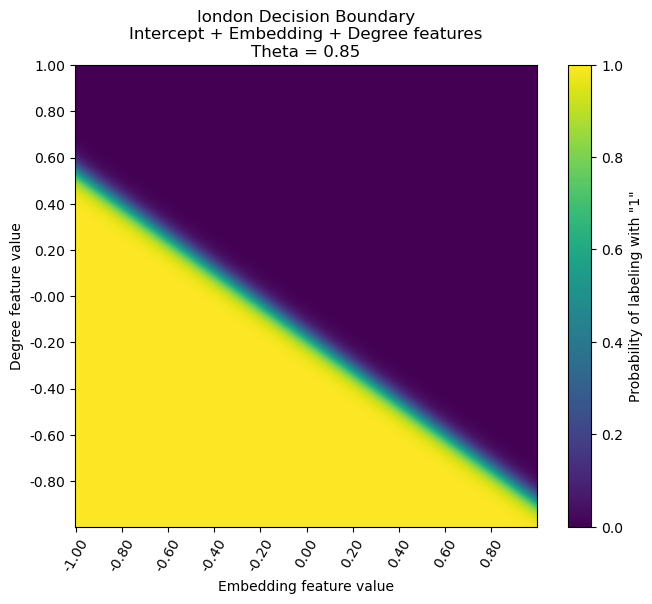

In [27]:
# Subset data
df_ = df.query("features == 'Intercept + Embedding + Degree' & system == @system")

# Set up predictor
X = np.linspace(-1,1, num=500)

# Set up figure

# Calculate decision boundary
for df_group in list(df_.groupby("theta"))[::4]:
    plt.figure(figsize=(8,6))
    theta, df_group = df_group
    intercept = df_group.iloc[0].intercept
    if intercept != intercept:
        continue
    coefs = df_group.iloc[0].coefficients[1:-1].split(", ")
    coef_emb = float(coefs[0])
    coef_deg = float(coefs[1])

    Z = np.array([
        logistic(emb=x, deg=y, intercept=intercept, coef_emb=coef_emb, coef_deg=coef_deg)
        for y in X for x in X
    ]).reshape(len(X), len(X))

    # Plot logistic curve
    plt.imshow(Z)

    # Prettify figure
    plt.colorbar(label="Probability of labeling with \"1\"")

    plt.xticks(range(len(X))[::50], labels=[f"{x:.2f}" for x in X[::50]], rotation=60)
    plt.yticks(range(len(X))[::50], labels=[f"{x:.2f}" for x in X[::-50]])

    plt.xlabel("Embedding feature value")
    plt.ylabel("Degree feature value")
    plt.title(f"{system} Decision Boundary\nIntercept + Embedding + Degree features\nTheta = {theta:.2f}")